# Линейная регрессия

На сегодняшнем занятии будем работать с датасетом BlackFriday (ниже есть его описание):

https://www.kaggle.com/mehdidag/black-friday/version/1

Description
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Подготовка данных

In [3]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


Скорее всего NaN-ы в Product_Category_2 и Product_Category_3 означают, что человек не покупал продукты из этих категорий.

Поэтому можем заменить эти пропущенные значения на 0.

In [4]:
data = data.fillna(0)

In [5]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


Посмотрим, какие типы данных есть в нашем датасете. 

Выведите на экран тип каждой колонки в таблице.

In [7]:
#your code here

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Обработаем нечисловые колонки.

1) Выведите на экран все возможные значения из столбца Gender.

2) Замените значение 'M' на 1, а 'F' на 0.

In [8]:
#your code here

print(data['Gender'].unique())

data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

['F' 'M']


Поработаем со столбцом Age.

1) Выведите на экран все возможные значения из столбца Age.

2) Напишите функцию для перевода каждого диапазона возрастов в число (самые маленькие возрасты - 0, следующий диапазон - 1 и т.д.). Замените значения в столбце Age на числовые, применив эту функцию.

In [9]:
#your code here

print(data['Age'].unique())

def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    return 6

data['Age'] = data['Age'].apply(map_age)

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


Обработаем столбец City_Category.

1) Выведите все уникальные значения данного столбца.

2) Закодируйте столбец с помощью OneHotEncoding (get_dummies).

In [10]:
#your code here

print(data['City_Category'].unique())

data = pd.get_dummies(data,columns=['City_Category'],dtype = int)
data

['A' 'C' 'B']


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370,1,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422,1,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057,1,0,0
4,1000002,P00285442,1,6,16,4+,0,8,0.0,0.0,7969,0,0,1
5,1000003,P00193542,1,2,15,3,0,1,2.0,0.0,15227,1,0,0
6,1000004,P00184942,1,4,7,2,1,1,8.0,17.0,19215,0,1,0
7,1000004,P00346142,1,4,7,2,1,1,15.0,0.0,15854,0,1,0
8,1000004,P0097242,1,4,7,2,1,1,16.0,0.0,15686,0,1,0
9,1000005,P00274942,1,2,20,1,1,8,0.0,0.0,7871,1,0,0


Наконец, обработаем Stay_In_Current_City_Years.

1) Выведите на экран все уникальные значения данного столбца.

2) Замените '4+' на 4, а все остальные значения оставьте как есть, но переведите их в числовой вид (x -> int(x)).

In [11]:
#your code here

def map_stay(stay):
    if stay == '4+':
        return 4
    else:
        return int(stay)

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_stay)    

In [12]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370,1,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422,1,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057,1,0,0
4,1000002,P00285442,1,6,16,4,0,8,0.0,0.0,7969,0,0,1


Удалим столбцы User_ID и Product_ID.

In [13]:
#your code here

cols = ['User_ID','Product_ID']
data.drop(cols, inplace = True, axis =1)

# Исследование данных

1. Как влияет пол на целевую переменную Purchase? Постройте диаграмму.

2. Как влияет возраст на целевую переменную Purchase? Постройте диаграмму.

3. Как влияет City_Category на целевую переменную Purchase? Постройте диаграмму.

In [29]:
#your code here

Нарисуйте матрицу корреляций признаков.

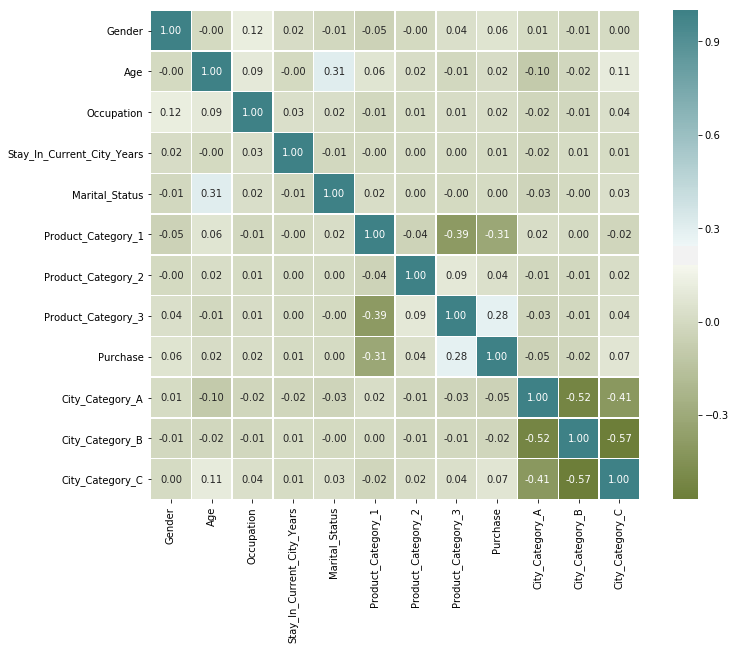

In [14]:
plt.figure(figsize=(12,9))
#your code here

corr = data.corr()
sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200, as_cmap=True), square=True)

# Построение модели

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = data.copy()

y = data['Purchase']
del X['Purchase']

ind_train, ind_test = train_test_split(range(len(X)), test_size=0.2, random_state=111)
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=0)
Xtrain = X.iloc[ind_train]
ytrain = y[ind_train]
Xtest = X.iloc[ind_test]
ytest = y[ind_test]

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred = regressor.predict(Xtest)
print(ypred)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
C:\Users\elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


[11963.10657722  7656.86089854  8520.98589854 ...  7328.35657722
  9953.73589854  9088.85657722]


In [16]:
r2_score(ytest,ypred), mean_squared_error(ytest,ypred)

(0.13495353377903874, 21524527.74481841)

Добавим L1 регуляризацию.

In [25]:
from sklearn.linear_model import Lasso

for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.13494738179098587 21524680.821725495
[  209.79166474   134.68945557    38.76806793    13.87268116
   -21.18265405 -1194.03924529    52.23897436   925.99364947
  -216.73729641  -170.47598645    85.35117323] 

alpha=25.1
Scores: 0.13480786848880688 21528152.26292638
[  188.50811743   106.92494212    19.97494348     0.
    -0.         -1175.99793213    30.43017283   911.83199471
   -48.01844206    -0.           230.76400322] 

alpha=50.1
Scores: 0.1344086702715469 21538085.31674329
[ 1.66888373e+02  8.59178297e+01  7.44617695e-01  0.00000000e+00
 -0.00000000e+00 -1.15798073e+03  8.49709163e+00  8.97627258e+02
 -3.21491481e+01 -0.00000000e+00  2.16556378e+02] 

alpha=75.1
Scores: 0.1338293635832145 21552499.921475727
[  143.18124984    62.97678482     0.             0.
     0.         -1139.73898569     0.           882.15849546
   -16.16999624    -0.           201.72695779] 



**Видим, что L1-регуляризация зануляет некоторые веса и таким образом производит отбор признаков.**

Подберем оптимальное значение параметра регуляризации по кросс-валидации

In [18]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1    ,  0.14975, ...,  9.95025, 10.     ]),
    copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
    verbose=False)

In [19]:
lasso_cv.coef_

array([ 482.17884173,  103.48247372,    5.6977877 ,    9.5209288 ,
        -47.30950547, -317.88728808,    8.13645587,  148.34907592,
       -177.5466592 ,  -30.6164984 ,  484.05862112])

In [20]:
lasso_cv.alpha_

0.1

In [29]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))

Scores: 0.13494738179098587 21524680.821725495


Добавим L2 регуляризацию.

In [36]:
from sklearn.linear_model import Ridge

for a in np.arange(-10,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=-10.0
Scores: 0.13494724192487384 21524684.30194549
[  209.87938069   134.8261164     38.84209299    13.96744463
   -21.32679153 -1194.13193756    52.32439135   926.06471565
  -121.32406235   -64.20554392   184.92620237]
alpha=-7.5
Scores: 0.13494723998510239 21524684.350211874
[  209.87853004   134.82489531    38.84217655    13.967397
   -21.32639768 -1194.12618703    52.32465256   926.06159696
  -121.32376637   -64.20535068   184.92571212]
alpha=-5.0
Scores: 0.13494723804059816 21524684.39859602
[  209.87767939   134.82367424    38.84226009    13.96734938
   -21.32600383 -1194.12043656    52.32491377   926.05847828
  -121.32347038   -64.20515745   184.92522188]
alpha=-2.5
Scores: 0.13494723609136117 21524684.44709793
[  209.87682876   134.82245319    38.84234364    13.96730176
   -21.32561    -1194.11468616    52.32517496   926.05535961
  -121.3231744    -64.20496421   184.92473163]
alpha=0.0
Scores: 0.13494723413739185 21524684.495717593
[  209.87597813   134.82123217    38.84

**Ridge регрессия не зануляет веса (они могут быть очень маленькими, но ненулевыми).**

Теперь подберем оптимальное a по кросс-валидации.

In [26]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000e-02, 1.09699e-02, ..., 9.11589e+05, 1.00000e+06]),
    cv=3, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [27]:
ridge_cv.alpha_

289.94228538828753

In [28]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3 = regressor3.predict(Xtest)

print('Scores:', r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))

Scores: 0.12456410982887534 21783042.69494001


Добавим одновременно и L1, и L2 регуляризацию.

У ElasticNet два параметра: alpha и l1_ratio.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [30]:
from sklearn.linear_model import ElasticNet

#your code here

regressor4 = ElasticNet(alpha=0.1, l1_ratio=0.3)
regressor4.fit(Xtrain, ytrain)

ypred4 = regressor4.predict(Xtest)

print(r2_score(ytest,ypred4), mean_squared_error(ytest,ypred4))

0.13461424024374036 21532970.219759755


Посмотрим на веса, которые присвоила линейная регрессия признакам.

In [31]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,2.102467e+02
1,Age,1.371059e+02
2,Occupation,3.893183e+01
3,Stay_In_Current_City_Years,1.352744e+01
4,Marital_Status,-2.135700e+01
5,Product_Category_1,-1.194135e+03
6,Product_Category_2,5.233571e+01
7,Product_Category_3,9.259797e+02
8,City_Category_A,1.184227e+15
9,City_Category_B,1.319180e+15


In [32]:
len(data),len(Xtest)

(537577, 107516)

# Feature Ingineering

Попробуйте соорудить новые признаки.

Идеи:

1) Группировка исходных признаков по бинам
(попробуйте сгруппировать числовые признаки, например, Product_Category_1(2,3))

2) Перемножение признаков, которые в паре могут влиять на результат (линейная регрессия не умеет умножать)

3) Взятие других функций от признаков.

4) Счётчики.

In [ ]:
#your code here

In [113]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [160]:
data['age_average'] = list(map(code_mean(data.iloc[ind_train], 'Age', "Purchase").get, data.Age))
#your code here